Before running this notebook, please do the following
1. Download the data that Derek shared with you (https://vanderbilt.box.com/s/sgb996yj09bmev6yhc7slf053nz74p9q)
2. Download camera_calibration_points csv file. Click "raw" and save as csv (https://github.com/DerekGloudemans/I24-video-processing/blob/main/config/camera_calibration_points_I24_validation_system.csv)
and add to your local repository such that the directory looks like

```
YOUR LOCAL FOLDER
└───2D-3D May 2021
|   |   camera_calibration_points_I24_validation_system.csv
|   |   record_xxx.csv
|   |   ...
│
└───I24-data-generation
    │   README.md
    |   utils.py
    |   I24_visualization.ipynb
    |   I24_xxx.ipynb
    |   ...
```

As for the roadmap, for the short term we can:
1. Recreate the same plots that I showed you today by playing around this notebook. You’re welcome to add your own modifications to it.
2. Overlay a road drawing at the background (so that we know which lane the cars are at)
3. Make an animation!
4. Add multiple vehicles across different camera view.

In [5]:
# import packages
from utils import *
import importlib
import utils
importlib.reload(utils)
import os.path
from os import path
import pandas as pd
import mplcursors
import matplotlib.pyplot as plt

In [2]:
# specify the data path and read the data into pandas dataframe
data_path = pathlib.Path().absolute().joinpath('../2D-3D May 2021')
file_name = data_path.joinpath('record_p2c4_00001_track_outputs_corrected_3D.csv')
df = utils.read_data(file_name)
path_vpts = data_path.joinpath('camera_calibration_points_I24_validation_system.csv')
df = utils.calc_rr_coords(df, 'P2C4', path_vpts)

# transform GPS coordinates to road coordinates (you don't need to worry about this for now)
A = [36.003412, -86.608591] # south west side, so that x, y coords obey counterclockwise
B = [36.002495, -86.607566]
df = utils.calc_xy(df,A,B)
df.head()

,Frame #,Timestamp,ID,Object class,BBox xmin,BBox ymin,BBox xmax,BBox ymax,vel_x,vel_y,...,bbllat,bbllon,fbr_y,fbl_y,bbr_y,bbl_y,fbr_x,fbl_x,bbr_x,bbl_x
0,12,1.754432e+09,4261,truck (other),3173.358887,736.454834,3724.237793,969.190308,0.000000,0.000000,...,36.002934,-86.607624,30.705307,28.940462,30.938787,28.865780,89.929210,90.059660,97.326876,97.764251
1,13,1.754432e+09,4261,truck (other),3126.146484,709.954346,3678.589111,958.313660,-47.212402,-26.500484,...,36.002941,-86.607632,30.716566,28.969448,30.962388,28.894766,88.829757,88.957738,96.239028,96.676301
2,14,1.754432e+09,4261,truck (other),3059.445068,716.770996,3595.803711,955.157410,-51.324215,-8.505295,...,36.002949,-86.607640,30.716553,28.964653,30.956440,28.890143,87.731586,87.858756,95.127143,95.547628
3,15,1.754432e+09,4261,truck (other),3005.979248,723.948914,3530.973389,956.836914,-53.225006,-2.704681,...,36.002956,-86.607649,30.700128,28.944146,30.945068,28.869555,86.617401,86.743684,94.002634,94.416834
4,16,1.754432e+09,4261,truck (other),2945.922607,731.941528,3466.830811,960.118103,-57.118340,0.522501,...,36.002964,-86.607657,30.716746,28.958296,30.958802,28.883881,85.520763,85.646061,92.903371,93.303702


In [3]:
# select one vehicle with specified ID to visualize
Y1 = df.loc[(df['ID']==80261)]
Y1 = Y1.interpolate(method='linear', limit_area='inside')
Y1 = Y1.dropna()
timestamps = Y1['Timestamp'].values

# extract GPS coordinates of the bottom 4 points of this vehicle
Y1gps = np.array(Y1[['bbrlat','bbrlon','fbrlat','fbrlon','fbllat','fbllon','bbllat','bbllon']])
# extract the road coordinates of the bottom 4 points
Y1 = np.array(Y1[['bbr_x','bbr_y', 'fbr_x','fbr_y','fbl_x','fbl_y','bbl_x', 'bbl_y']])

In [4]:
# plot the GPS coordinates on google map
import utils
importlib.reload(utils)
AB = np.array([A,B])
lats = AB[:,0]
lngs = AB[:,1]
utils.draw_map_box(Y1gps,Y1gps[0,0],Y1gps[0,1], 30, lats, lngs)


###############################

 Beginning Key Insertion ...

Key Insertion Completed!!


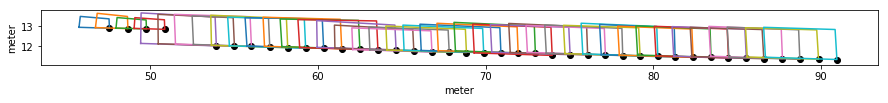

In [6]:
# plot on the road coordinates

D = Y1
fig, ax = plt.subplots(figsize=(15,1))
# %pylab

# mplcursors.cursor(hover=True)

for i in range(len(D)):
    coord = D[i,:]
    coord = np.reshape(coord,(-1,2)).tolist()
    coord.append(coord[0]) #repeat the first point to create a 'closed loop'
    xs, ys = zip(*coord) #lon, lat as x, y
    plt.plot(xs,ys)

plt.scatter(D[:,2],D[:,3],color='black')
# plt.scatter(cx,cy)
# plt.plot([A[0], B[0]], [A[1], B[1]], 'r--')

ax = plt.gca()
plt.xlabel('meter')
plt.ylabel('meter')
ax.format_coord = lambda x,y: '%.6f, %.6f' % (x,y)
plt.show() 